# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [175]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [176]:
# Checking the number of mice.
print(mouse_data['Mouse ID'].nunique())

249


In [177]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data[mouse_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicates['Mouse ID'].unique()

print(duplicate_mice)

['g989']


In [178]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [179]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data.drop_duplicates(subset='Mouse ID', keep='first')
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [180]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_mouse_data))

249


## Summary Statistics

In [181]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [182]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats2 = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

summary_stats2

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

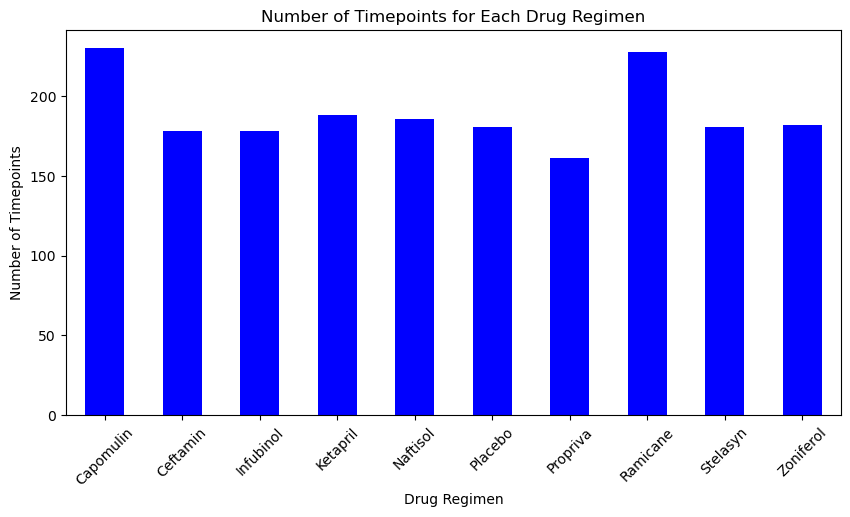

In [183]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_counts = mouse_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot using Pandas
timepoint_counts.plot(kind='bar', figsize=(10, 5), color='blue')

# Set the chart title and axis labels
plt.title('Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Display the plot
plt.show()


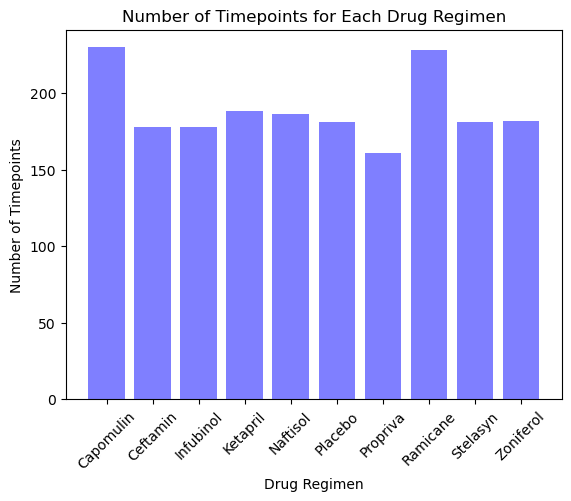

In [184]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_counts = mouse_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot using Pyplot
plt.bar(timepoint_counts.index, timepoint_counts.values, color='blue', alpha=0.5)

# Set the chart title and axis labels
plt.title('Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Display the plot
plt.show()


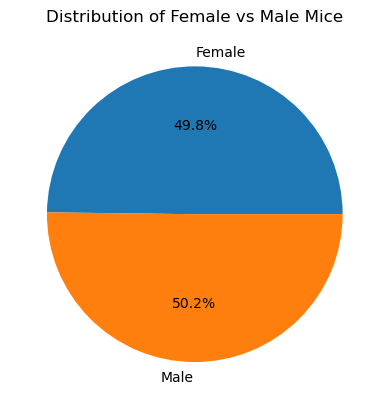

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = mouse_data.groupby('Sex')['Mouse ID'].nunique()

# Create a pie plot using Pandas
sex_counts.plot(kind='pie', autopct='%1.1f%%')

# Set the chart title and axis labels
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')

# Display the plot
plt.show()


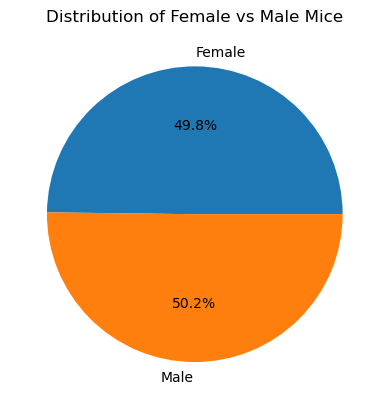

In [186]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = mouse_data.groupby('Sex')['Mouse ID'].nunique()

# Create a pie plot using pyplot
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')

# Set the chart title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [187]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
selected_df = mouse_data[mouse_data["Drug Regimen"].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = selected_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df = max_timepoint.to_frame().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_df, selected_df, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume = merged_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

final_tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [188]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = final_tumor_volumes.quantile([.25, .5, .75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
# Print summary statistics and potential outliers for each treatment
    print(f"------------------------")
    print(f"{treatment} Summary Statistics:")
    print(f"------------------------")
    print(f"Lower quartile: {lower_quartile:.2f}")
    print(f"Upper quartile: {upper_quartile:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    potential_outliers = final_tumor_volumes.loc[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    print(f"Potential outliers: {potential_outliers}\n")
    
    # Add final tumor volumes for current treatment to tumor_volumes list
    tumor_volumes.append(final_tumor_volumes)   

------------------------
Capomulin Summary Statistics:
------------------------
Lower quartile: 32.38
Upper quartile: 40.16
IQR: 7.78
Lower bound: 20.70
Upper bound: 51.83
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

------------------------
Ramicane Summary Statistics:
------------------------
Lower quartile: 31.56
Upper quartile: 40.66
IQR: 9.10
Lower bound: 17.91
Upper bound: 54.31
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

------------------------
Infubinol Summary Statistics:
------------------------
Lower quartile: 54.05
Upper quartile: 65.53
IQR: 11.48
Lower bound: 36.83
Upper bound: 82.74
Potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

------------------------
Ceftamin Summary Statistics:
------------------------
Lower quartile: 48.72
Upper quartile: 64.30
IQR: 15.58
Lower bound: 25.36
Upper bound: 87.67
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



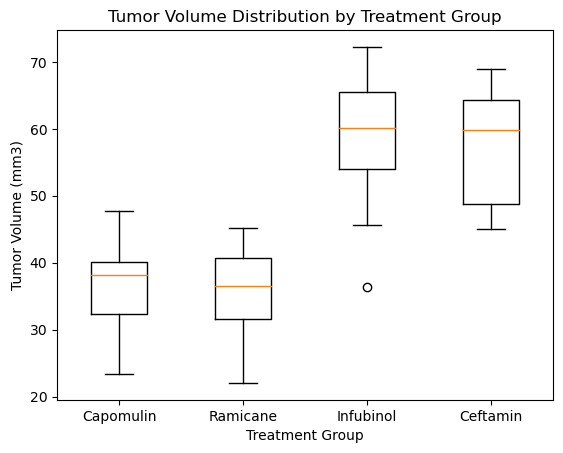

In [189]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a boxplot of tumor volume data for each treatment group
ax.boxplot(tumor_volumes)

# Set the title and axis labels
ax.set_title('Tumor Volume Distribution by Treatment Group')
ax.set_xlabel('Treatment Group')
ax.set_ylabel('Tumor Volume (mm3)')

# Set the tick labels to the treatments list
ax.set_xticklabels(treatments)

# Show the plot
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Time for Mouse s185 (Capomulin)')

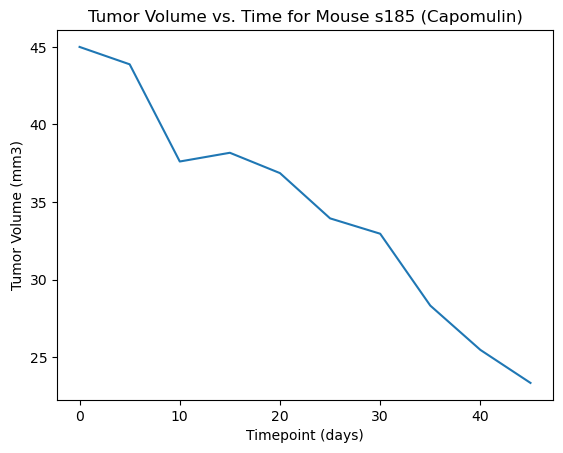

In [191]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data_copy = mouse_data.copy()

capomulin_data = mouse_data_copy[mouse_data_copy["Drug Regimen"] == "Capomulin"]

# Choose a mouse ID treated with Capomulin
mouse_id = "s185"

# Filter the Capomulin data to keep only the chosen mouse ID
mouse_data_copy = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Select the Timepoint and Tumor Volume columns
timepoints = mouse_data_copy["Timepoint"]
tumor_volumes = mouse_data_copy["Tumor Volume (mm3)"]

# Generate the line plot
plt.plot(timepoints, tumor_volumes)

# Set the x-axis and y-axis labels
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set the title
plt.title(f"Tumor Volume vs. Time for Mouse {mouse_id} (Capomulin)")


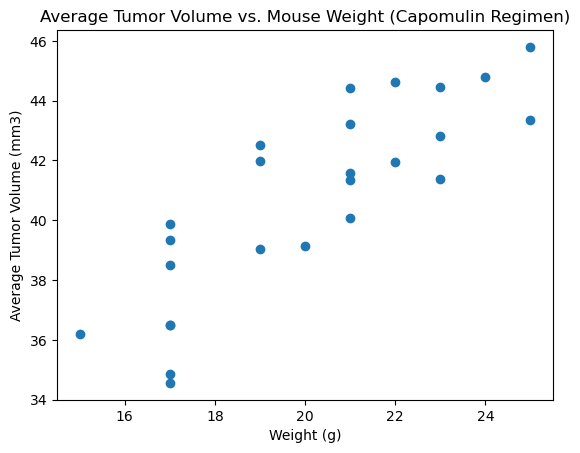

In [192]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = mouse_data[mouse_data["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID to calculate average tumor volume and weight
capomulin_grouped = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

# Select the Timepoint and Tumor Volume columns
timepoints = mouse_data["Timepoint"]
tumor_volumes = mouse_data["Tumor Volume (mm3)"]

# Create a scatter plot
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])

# Set the title and axis labels
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


## Correlation and Regression

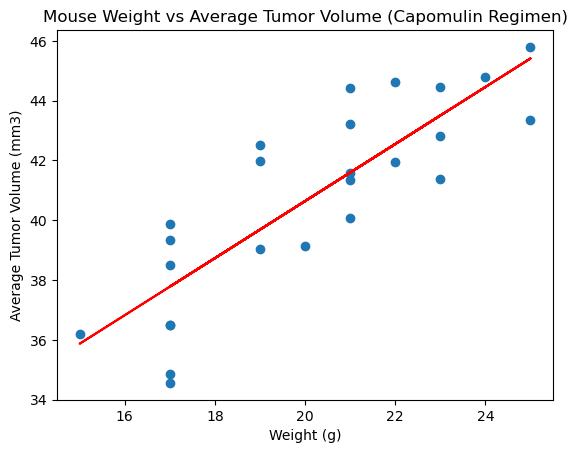

In [193]:
# Calculate the correlation coefficient and linear regression model 
# Use linear regression to calculate the slope, intercept, and r-value
slope, intercept, rvalue, pvalue, _ = linregress(x, y)

# Plot the scatter plot with the regression line
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, slope*x + intercept, color='red')
ax.set_xlabel("Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")
ax.set_title("Mouse Weight vs Average Tumor Volume (Capomulin Regimen)")

# Display the plot
plt.show()
